<a href="https://colab.research.google.com/github/wilcom1/Dendrograma/blob/main/Dendrograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRIPT PARA CONSTRUCCIÓN DE DENDROGRAMA

Este script construye un dendrograma a partir de los resultados de una actividad de card sorting para definir la arquitectura de la información de una aplicación web/Móvil.
Para la construcción del dendrograma se usa clustering jerárquico.

## Importación de datos

In [ ]:
import numpy as np # Librería para cálculos Avanzados
import pandas as pd  # Librería usada para el análisis de datos
import matplotlib.pyplot as plt # Librería usada para las gráficas.

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

##Se usa para mostrar los gráficos en el notebook
%matplotlib inline

# Cargue de la información a evaluar

Se carga la matriz de resultados del card sorting desde una ubicación en el disco duro. Esta ubicación puede cambiar de máquina a máquina por lo que es importante que se confirme que la ruta de la siguiente línea de código es correcta.

In [ ]:
resultados = pd.read_csv('/Matriz_resultados.csv',index_col=0,sep=';')

Se usa la funcion info para verificar que los datos del csv se hayan cargado correctamente.

In [ ]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Mi perfil to Ver información detallada del hogar
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SEGURIDAD            15 non-null     int64
 1   SERVICIO             15 non-null     int64
 2   USUARIO EN EL HOGAR  15 non-null     int64
 3   RECICLADOR           15 non-null     int64
 4   SIN ORDENAR          15 non-null     int64
dtypes: int64(5)
memory usage: 720.0+ bytes


Usando el comando head, se imprimen las primeras 5 filas del archivo para verificar que se haya cargado la información de manera correcta.

In [ ]:
resultados.head()

,SEGURIDAD,SERVICIO,USUARIO EN EL HOGAR,RECICLADOR,SIN ORDENAR
OPCIÓN,,,,,
Mi perfil,7,1,2,0,0
Solicitar servicio de recolección,0,6,3,1,0
Cambiar contraseña,8,0,2,0,0
Cerrar Sesión,7,1,2,0,0
Ver lista de recicladores,2,2,3,3,0


Se extraen los valores numéricos únicamente y se empaquetan dentro de un arreglo. Para eso se usa la función **iloc** del objeto resultados.

In [ ]:
ocurrencias = resultados.iloc[:,[0,1,2,3,4]].values
ocurrencias

array([[7, 1, 2, 0, 0],
       [0, 6, 3, 1, 0],
       [8, 0, 2, 0, 0],
       [7, 1, 2, 0, 0],
       [2, 2, 3, 3, 0],
       [3, 5, 1, 1, 0],
       [1, 1, 5, 3, 0],
       [0, 8, 2, 0, 0],
       [0, 4, 4, 2, 0],
       [1, 2, 4, 3, 0],
       [0, 6, 2, 2, 0],
       [0, 5, 0, 5, 0],
       [1, 6, 2, 1, 0],
       [0, 3, 2, 5, 0],
       [0, 2, 3, 5, 0]])

## Dendrograma

In [ ]:
clustering_jerarquico = linkage(ocurrencias, 'ward')

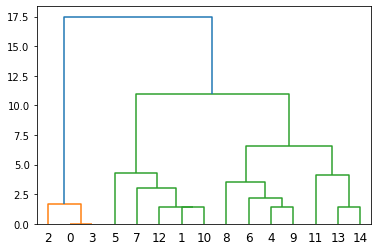

In [ ]:
dendrogram = sch.dendrogram(clustering_jerarquico)

Se determina la altura de

In [ ]:
clusters = fcluster(clustering_jerarquico, t=5,criterion='distance')
clusters

array([1, 2, 1, 1, 3, 2, 3, 2, 3, 3, 2, 4, 2, 4, 4], dtype=int32)

In [ ]:
resultados['CLUSTERING_JERARQUICO']=clusters
resultados

,SEGURIDAD,SERVICIO,USUARIO EN EL HOGAR,RECICLADOR,SIN ORDENAR,custering_jerarquico,CLUSTERING_JERARQUICO
OPCIÓN,,,,,,,
Mi perfil,7,1,2,0,0,1,1
Solicitar servicio de recolección,0,6,3,1,0,2,2
Cambiar contraseña,8,0,2,0,0,1,1
Cerrar Sesión,7,1,2,0,0,1,1
Ver lista de recicladores,2,2,3,3,0,3,3
Histórico de servicios,3,5,1,1,0,2,2
Ver información detallada del reciclador,1,1,5,3,0,3,3
Ver información detallada del servicio,0,8,2,0,0,2,2
Ofrecer compensación a reciclador,0,4,4,2,0,3,3
